### First we import the libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner


In [2]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
import json # library to handle JSON files


In [47]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2020
  - defaults/noarch::ibm-wsrt-py37main-main==custom=2020
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
done

# All requested packages already installed.



In [4]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [7]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [8]:
!pip install folium
import folium

In [9]:
!pip install bs4
from bs4 import BeautifulSoup # this module helps in web scrapping.

### We download and store the data into a dataframe

#### Toronto

In [181]:
#define the url from wich we will webscape the data 
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
data  = requests.get(url).text
soup = BeautifulSoup(data,"lxml")

In [182]:
#append data on a dataframe called toronto_df
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

toronto_df=pd.DataFrame(table_contents)
toronto_df['Borough']=toronto_df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})


In [183]:
toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [184]:
toronto_df.shape

(103, 3)

In [185]:
#using the watson interface to read the Geospatial_Coordinates in pandas 

In [186]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [187]:
coordinates=coordinates.rename(columns={"Postal Code":"PostalCode"})

In [188]:
#merging the two dataframes
toronto=pd.merge(toronto_df,coordinates,on="PostalCode")

In [189]:
toronto.drop("PostalCode",axis=1,inplace=True)

In [190]:
toronto.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [191]:
toronto.shape

(103, 4)

In [192]:
toronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       103 non-null    object 
 1   Neighborhood  103 non-null    object 
 2   Latitude      103 non-null    float64
 3   Longitude     103 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.0+ KB


#### New York

In [198]:
# We download the htlm as a json file and we load it with the json_load function

In [193]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [194]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [195]:
ny_data = newyork_data['features']

In [196]:
ny_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [197]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
newyork = pd.DataFrame(columns=column_names)

In [199]:
# we store the data in the dataframe called newyork
for data in ny_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork = newyork.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [200]:
newyork.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [201]:
newyork.shape

(306, 4)

In [202]:
newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       306 non-null    object 
 1   Neighborhood  306 non-null    object 
 2   Latitude      306 non-null    float64
 3   Longitude     306 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.7+ KB


### Now we will make some graphs for demographic exploration of the two towns

#### Toronto

In [203]:
toronto_neigh=toronto.groupby("Borough").count()

In [204]:
toronto_neigh.reset_index(inplace=True)

In [205]:
toronto_neigh

,Borough,Neighborhood,Latitude,Longitude
0,Central Toronto,9,9,9
1,Downtown Toronto,17,17,17
2,Downtown Toronto Stn A,1,1,1
3,East Toronto,4,4,4
4,East Toronto Business,1,1,1
5,East York,4,4,4
6,East York/East Toronto,1,1,1
7,Etobicoke,11,11,11
8,Etobicoke Northwest,1,1,1
9,Mississauga,1,1,1


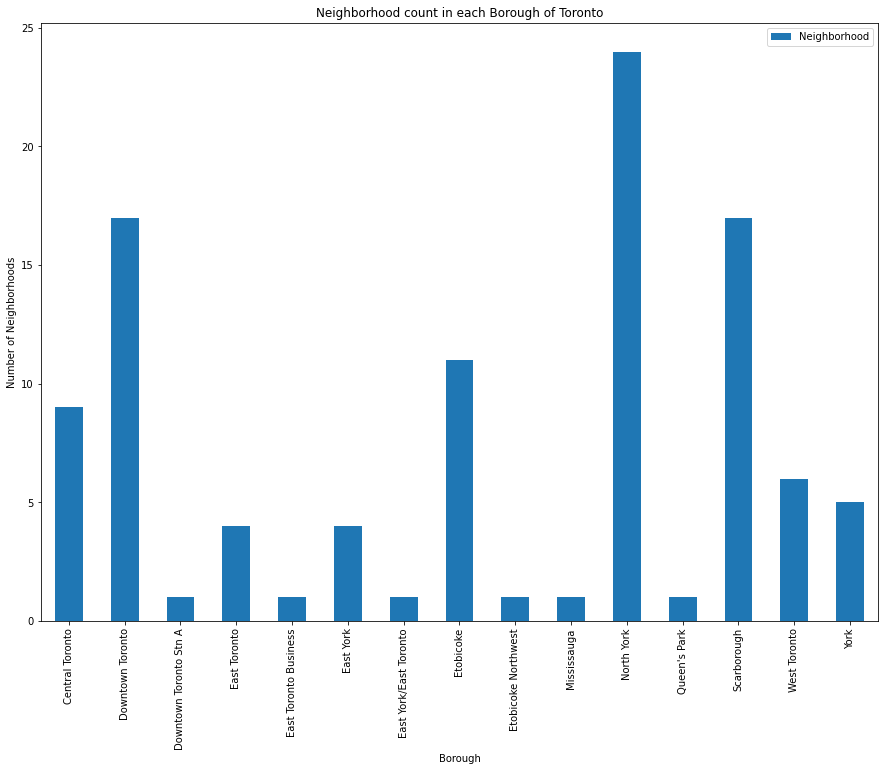

In [206]:
toronto_neigh.plot(kind="bar",x="Borough",y="Neighborhood",figsize=(15,11))
plt.title("Neighborhood count in each Borough of Toronto")
plt.ylabel("Number of Neighborhoods")
plt.xlabel("Borough")
plt.show()

#### New York

In [207]:
newyork_neigh=newyork.groupby("Borough").count()

In [208]:
newyork_neigh.reset_index(inplace=True)

In [209]:
newyork_neigh

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,52,52,52
1,Brooklyn,70,70,70
2,Manhattan,40,40,40
3,Queens,81,81,81
4,Staten Island,63,63,63


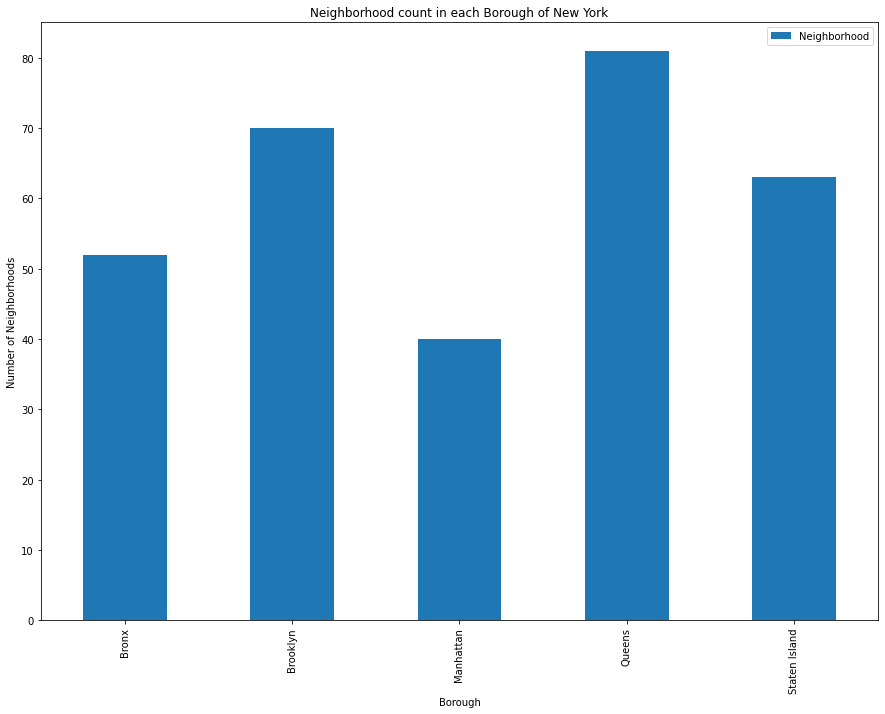

In [210]:
newyork_neigh.plot(kind="bar",x="Borough",y="Neighborhood",figsize=(15,11))
plt.title("Neighborhood count in each Borough of New York")
plt.ylabel("Number of Neighborhoods")
plt.xlabel("Borough")
plt.show()

### Utilizing folium to create a map for each town

#### Toronto

In [212]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [213]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto['Latitude'], toronto['Longitude'], toronto['Borough'], toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### New York

In [214]:
address = 'New York'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [215]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(newyork['Latitude'], newyork['Longitude'], newyork['Borough'], newyork['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Let's define the credential's in order to use the foursquare API

In [217]:
CLIENT_ID = 'MGDPHEGCADAVPLR5OP4JATKQMXUJYD5HQ2IQ3ZNRZJBOOBNN' # your Foursquare ID
CLIENT_SECRET = 'VEQLJJVV33S4Y110S3M0FVZC1A14RE5NDD20DDDYRSRE5BLH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MGDPHEGCADAVPLR5OP4JATKQMXUJYD5HQ2IQ3ZNRZJBOOBNN
CLIENT_SECRET:VEQLJJVV33S4Y110S3M0FVZC1A14RE5NDD20DDDYRSRE5BLH


In [218]:
#Explore the first neighborhood in toronto

In [219]:
toronto.loc[0, 'Neighborhood']

'Parkwoods'

In [220]:
#Get the neighborhood's latitude and longitude values.

In [221]:
neighborhood_latitude = toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [222]:
#creating the Get request url
LIMIT=100
radius=500
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
CLIENT_ID,
CLIENT_SECRET,
VERSION,
neighborhood_latitude,
neighborhood_longitude,
radius,
LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=MGDPHEGCADAVPLR5OP4JATKQMXUJYD5HQ2IQ3ZNRZJBOOBNN&client_secret=VEQLJJVV33S4Y110S3M0FVZC1A14RE5NDD20DDDYRSRE5BLH&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [223]:
#Send the Get request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6075c265accc65309fb10567'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [225]:
#define a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [226]:
#Clean the json and structure it into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Brookbanks Pool,Pool,43.751389,-79.332184
2,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [227]:
#How many venues were returned from Foursquare API
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


In [228]:
#Let's create a function to repeat the same process to all the neighborhoods in both Toronto and New York

In [229]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Now we write the code to run the above function on each neighborhood and create a two dataframes called toronto_venues and newyork_venues.

#### Toronto

In [231]:
toronto_venues=getNearbyVenues(names=toronto['Neighborhood'],latitudes=toronto['Latitude'],longitudes=toronto['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [232]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Brookbanks Pool,43.751389,-79.332184,Pool
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [233]:
toronto_venues=pd.merge(toronto,toronto_venues,on="Neighborhood")

In [336]:
toronto_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,North York,Parkwoods,43.753259,-79.329656,Brookbanks Pool,43.751389,-79.332184,Pool
2,North York,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,North York,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,North York,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [235]:
toronto_venues.drop(["Latitude","Longitude"],axis=1,inplace=True)

In [236]:
toronto_venues.shape

(2119, 8)

#### New York

In [237]:
newyork_venues=getNearbyVenues(names=newyork['Neighborhood'],latitudes=newyork['Latitude'],longitudes=newyork['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [238]:
newyork_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [239]:
newyork_venues=pd.merge(newyork,newyork_venues,on="Neighborhood")

In [240]:
newyork_venues.head()

,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Wakefield,40.894705,-73.847201,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Bronx,Wakefield,40.894705,-73.847201,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Bronx,Wakefield,40.894705,-73.847201,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Bronx,Wakefield,40.894705,-73.847201,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Bronx,Wakefield,40.894705,-73.847201,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [241]:
newyork_venues.drop(["Latitude","Longitude"],axis=1,inplace=True)

In [242]:
newyork_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Bronx,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Bronx,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Bronx,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Bronx,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [243]:
newyork_venues.shape

(10503, 8)

### Now we will make some more graphs depending on the venue's allocation in each town 

#### Toronto

In [253]:
#create the needed dataframes to make the plots

In [244]:
toronto_vn=toronto_venues.groupby("Borough").count()

In [245]:
toronto_vn.reset_index(inplace=True)

In [246]:
toronto_vn=toronto_vn[["Borough","Venue"]]

In [247]:
toronto_vn.head()

,Borough,Venue
0,Central Toronto,112
1,Downtown Toronto,1095
2,Downtown Toronto Stn A,99
3,East Toronto,102
4,East Toronto Business,17


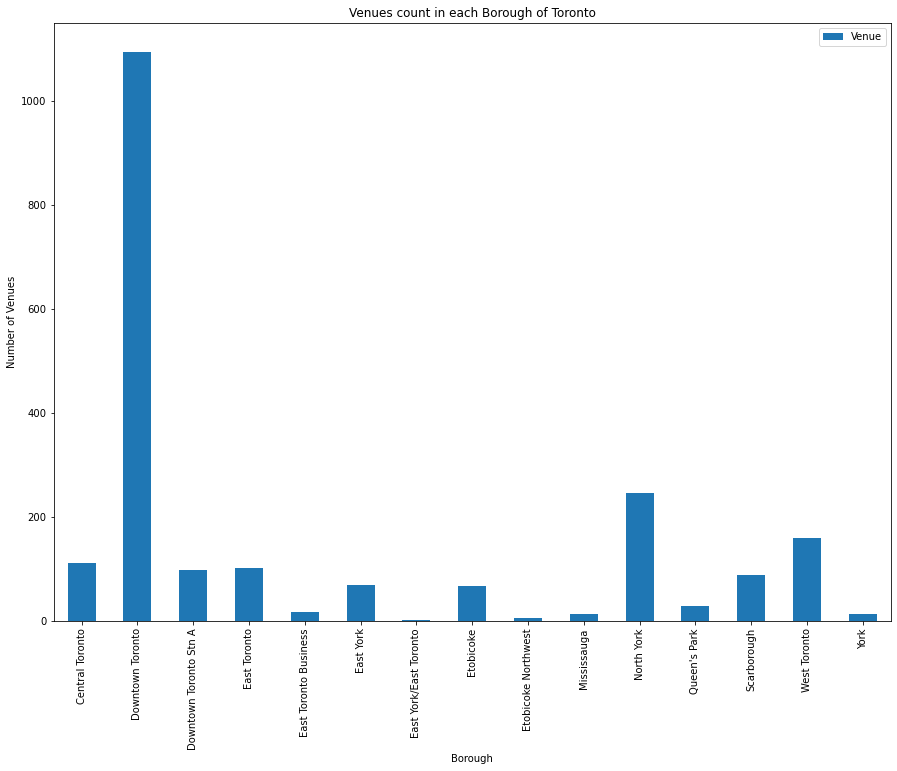

In [254]:
toronto_vn.plot(kind="bar",x="Borough",y="Venue",figsize=(15,11))
plt.title("Venues count in each Borough of Toronto")
plt.ylabel("Number of Venues")
plt.xlabel("Borough")
plt.show()

In [255]:
toronto_3=pd.merge(toronto_neigh,toronto_vn,on="Borough")

In [256]:
toronto_3

,Borough,Neighborhood,Latitude,Longitude,Venue
0,Central Toronto,9,9,9,112
1,Downtown Toronto,17,17,17,1095
2,Downtown Toronto Stn A,1,1,1,99
3,East Toronto,4,4,4,102
4,East Toronto Business,1,1,1,17
5,East York,4,4,4,70
6,East York/East Toronto,1,1,1,2
7,Etobicoke,11,11,11,67
8,Etobicoke Northwest,1,1,1,5
9,Mississauga,1,1,1,14


In [257]:
import seaborn as sns

Text(0, 0.5, 'Number of Venues')

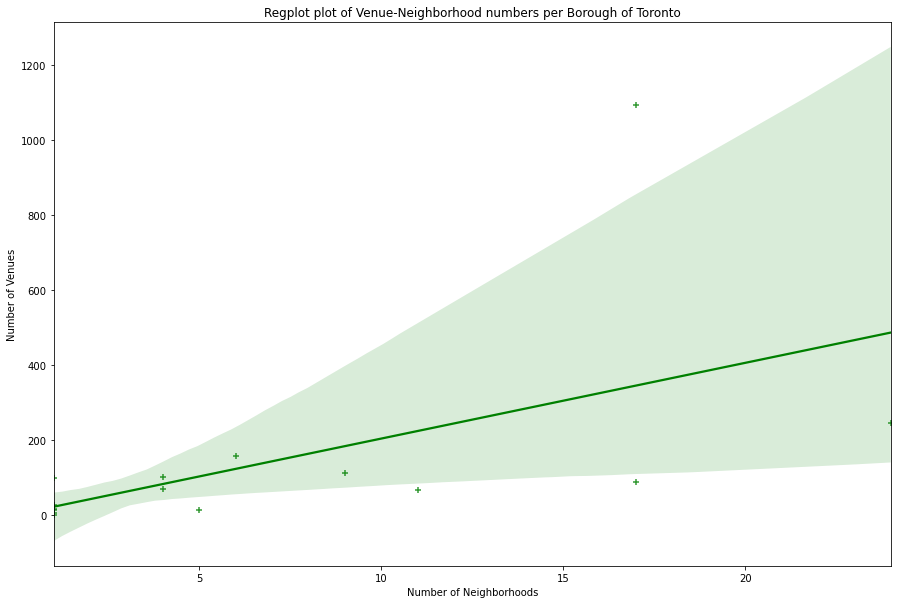

In [333]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x="Neighborhood", y="Venue", data=toronto_3, color='green', marker='+')
plt.title('Regplot plot of Venue-Neighborhood numbers per Borough of Toronto')
plt.xlabel('Number of Neighborhoods')
plt.ylabel('Number of Venues')
    

Text(0, 0.5, 'Number of Venues')

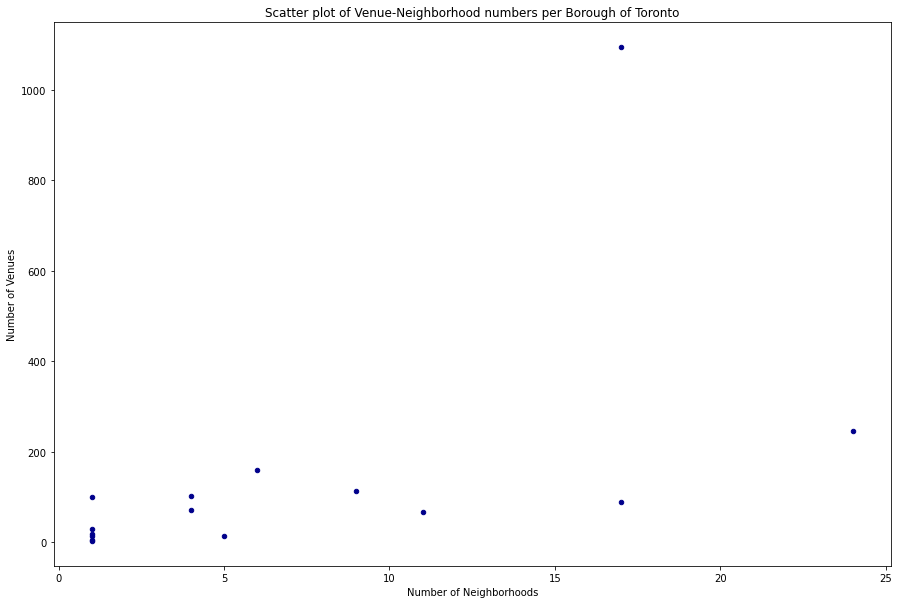

In [259]:
toronto_3.plot(kind='scatter', x='Neighborhood', y='Venue', figsize=(15, 10), color="darkblue")

plt.title('Scatter plot of Venue-Neighborhood numbers per Borough of Toronto')
plt.xlabel('Number of Neighborhoods')
plt.ylabel('Number of Venues')
    

#### New york 

In [260]:
newyork_vn=newyork_venues.groupby("Borough").count()

In [261]:
newyork_vn.reset_index(inplace=True)

In [262]:
newyork_vn=newyork_vn[["Borough","Venue"]]

In [263]:
newyork_vn.head()

,Borough,Venue
0,Bronx,1224
1,Brooklyn,2760
2,Manhattan,3290
3,Queens,2229
4,Staten Island,1000


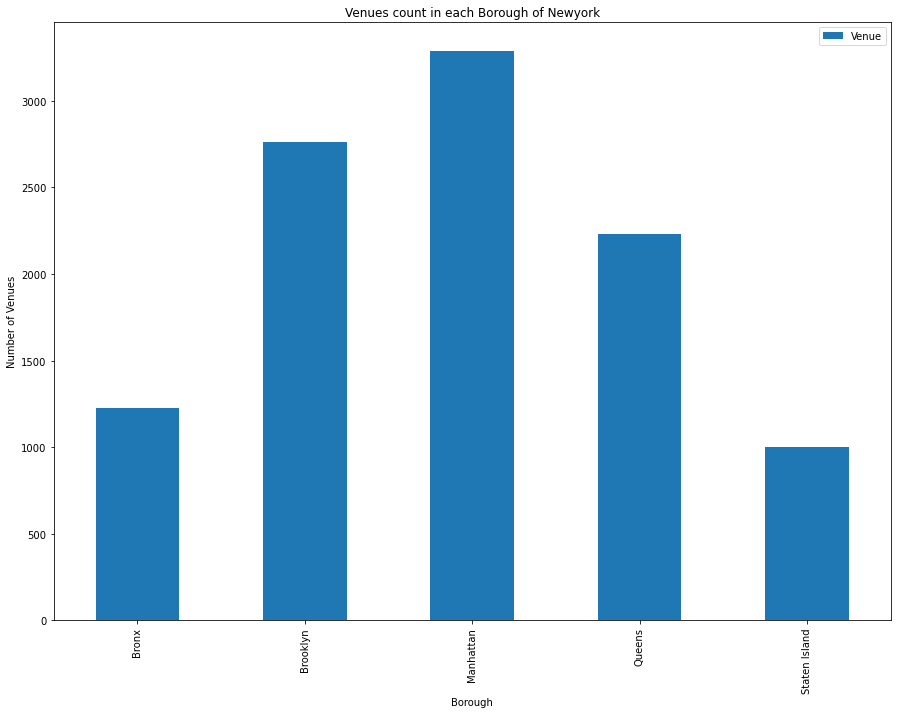

In [264]:
newyork_vn.plot(kind="bar",x="Borough",y="Venue",figsize=(15,11))
plt.title("Venues count in each Borough of Newyork")
plt.ylabel("Number of Venues")
plt.xlabel("Borough")
plt.show()

In [265]:
newyork_3=pd.merge(newyork_neigh,newyork_vn,on="Borough")

In [266]:
newyork_3

,Borough,Neighborhood,Latitude,Longitude,Venue
0,Bronx,52,52,52,1224
1,Brooklyn,70,70,70,2760
2,Manhattan,40,40,40,3290
3,Queens,81,81,81,2229
4,Staten Island,63,63,63,1000


Text(0, 0.5, 'Number of Venues')

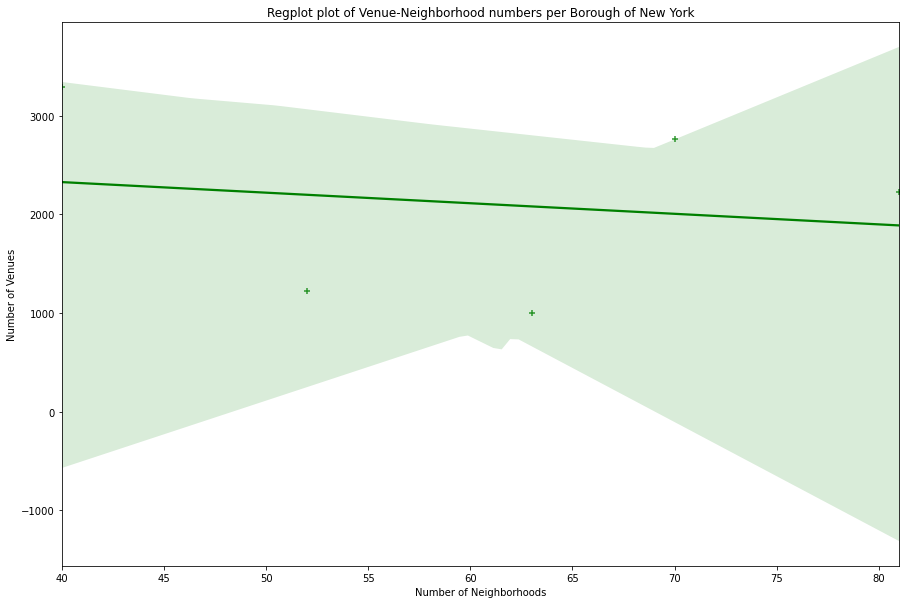

In [334]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x="Neighborhood", y="Venue", data=newyork_3, color='green', marker='+')
plt.title('Regplot plot of Venue-Neighborhood numbers per Borough of New York')
plt.xlabel('Number of Neighborhoods')
plt.ylabel('Number of Venues')
    

Text(0, 0.5, 'Number of Venues')

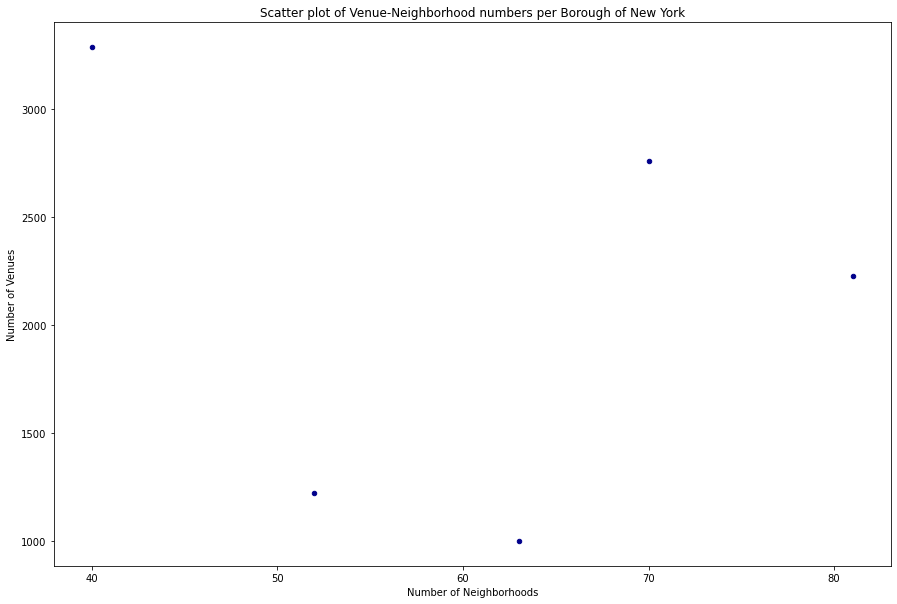

In [268]:
newyork_3.plot(kind='scatter', x='Neighborhood', y='Venue', figsize=(15, 10), color="darkblue")

plt.title('Scatter plot of Venue-Neighborhood numbers per Borough of New York')
plt.xlabel('Number of Neighborhoods')
plt.ylabel('Number of Venues')
    

### Analyze each Borough

#### Toronto

In [269]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Borough'] = toronto_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Borough,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,North York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [276]:
#grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [277]:
toronto_grouped = toronto_onehot.groupby('Borough').mean().reset_index()
toronto_grouped

,Borough,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Central Toronto,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.008929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929

In [278]:
toronto_grouped.shape

(15, 268)

In [279]:
#printing each neighborhood along with the top 5 venues 

In [280]:
num_top_venues = 5

for hood in toronto_grouped['Borough']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Toronto----
            venue  freq
0     Coffee Shop  0.07
1            Park  0.06
2  Sandwich Place  0.06
3     Pizza Place  0.05
4            Café  0.05


----Downtown Toronto----
         venue  freq
0  Coffee Shop  0.10
1         Café  0.05
2        Hotel  0.03
3   Restaurant  0.03
4       Bakery  0.02


----Downtown Toronto Stn A----
                 venue  freq
0          Coffee Shop  0.12
1   Seafood Restaurant  0.04
2  Japanese Restaurant  0.03
3         Cocktail Bar  0.03
4                Hotel  0.03


----East Toronto----
                venue  freq
0    Greek Restaurant  0.08
1         Coffee Shop  0.06
2  Italian Restaurant  0.05
3      Ice Cream Shop  0.04
4             Brewery  0.04


----East Toronto Business----
              venue  freq
0       Yoga Studio  0.06
1     Auto Workshop  0.06
2              Park  0.06
3        Comic Shop  0.06
4  Recording Studio  0.06


----East York----
                 venue  freq
0          Coffee Shop  0.06
1              

In [281]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [282]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_boroughs_venues_sorted = pd.DataFrame(columns=columns)
toronto_boroughs_venues_sorted['Borough'] = toronto_grouped['Borough']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Coffee Shop,Park,Sandwich Place,Pizza Place,Café,Restaurant,Sushi Restaurant,Dessert Shop,Clothing Store,Italian Restaurant
1,Downtown Toronto,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Park,Bakery,Clothing Store,Gym
2,Downtown Toronto Stn A,Coffee Shop,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Hotel,Restaurant,Italian Restaurant,Beer Bar,Café,Bakery
3,East Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Brewery,Bakery,Restaurant,Café,Bookstore,Pub
4,East Toronto Business,Yoga Studio,Auto Workshop,Park,Comic Shop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place


In [283]:
toronto_boroughs_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Coffee Shop,Park,Sandwich Place,Pizza Place,Café,Restaurant,Sushi Restaurant,Dessert Shop,Clothing Store,Italian Restaurant
1,Downtown Toronto,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Park,Bakery,Clothing Store,Gym
2,Downtown Toronto Stn A,Coffee Shop,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Hotel,Restaurant,Italian Restaurant,Beer Bar,Café,Bakery
3,East Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Brewery,Bakery,Restaurant,Café,Bookstore,Pub
4,East Toronto Business,Yoga Studio,Auto Workshop,Park,Comic Shop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place
5,East York,Coffee Shop,Bank,Sporting Goods Shop,Burger Joint,Pizza Place,Indian Restaurant,Athletics & Sports,Beer Store,Supermarket,Sandwich Place
6,East York/East Toronto,Convenience Store,Park,Accessories Store,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Middle Eastern Restaurant
7,Etobicoke,Pizza Place,Sandwich Place,Pharmacy,Coffee Shop,Grocery Store,Gym,Fast Food Restaurant,Discount Store,Bakery,Café
8,Etobicoke Northwest,Garden Center,Truck Stop,Bar,Drugstore,Rental Car Location,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Accessories Store
9,Mississauga,Coffee Shop,Hotel,Mediterranean Restaurant,Gas Station,Middle Eastern Restaurant,Sandwich Place,American Restaurant,Gym,Burrito Place,Fried Chicken Joint


#### New york 

In [286]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Borough'] = newyork_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

,Borough,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera Hous

In [287]:
#grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [288]:
newyork_grouped = newyork_onehot.groupby('Borough').mean().reset_index()
newyork_grouped

,Borough,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera Hous

In [289]:
newyork_grouped.shape

(5, 433)

In [290]:
#printing each neighborhood along with the top 5 venues 

In [291]:
num_top_venues = 5

for hood in newyork_grouped['Borough']:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bronx----
           venue  freq
0    Pizza Place  0.08
1     Donut Shop  0.04
2  Grocery Store  0.04
3  Deli / Bodega  0.04
4    Bus Station  0.03


----Brooklyn----
                venue  freq
0         Pizza Place  0.05
1         Coffee Shop  0.04
2              Bakery  0.03
3                 Bar  0.03
4  Mexican Restaurant  0.02


----Manhattan----
                  venue  freq
0    Italian Restaurant  0.04
1           Coffee Shop  0.04
2  Gym / Fitness Center  0.02
3          Cocktail Bar  0.02
4                   Gym  0.02


----Queens----
                venue  freq
0       Deli / Bodega  0.04
1         Pizza Place  0.04
2  Chinese Restaurant  0.03
3              Bakery  0.03
4         Supermarket  0.02


----Staten Island----
                venue  freq
0         Pizza Place  0.06
1  Italian Restaurant  0.05
2       Deli / Bodega  0.04
3            Bus Stop  0.04
4         Coffee Shop  0.03




In [292]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
newyork_boroughs_venues_sorted = pd.DataFrame(columns=columns)
newyork_boroughs_venues_sorted['Borough'] = newyork_grouped['Borough']

for ind in np.arange(newyork_grouped.shape[0]):
    newyork_boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)

newyork_boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Pizza Place,Deli / Bodega,Donut Shop,Grocery Store,Italian Restaurant,Pharmacy,Sandwich Place,Bus Station,Chinese Restaurant,Bank
1,Brooklyn,Pizza Place,Coffee Shop,Bar,Bakery,Deli / Bodega,Italian Restaurant,Grocery Store,Chinese Restaurant,Café,Ice Cream Shop
2,Manhattan,Coffee Shop,Italian Restaurant,American Restaurant,Bakery,Café,Pizza Place,Park,Bar,Hotel,Gym / Fitness Center
3,Queens,Pizza Place,Deli / Bodega,Chinese Restaurant,Bakery,Donut Shop,Bar,Pharmacy,Bank,Italian Restaurant,Sandwich Place
4,Staten Island,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Coffee Shop,Pharmacy,Bagel Shop,Chinese Restaurant,Bar,American Restaurant


### Let's merge the dataframes we need of Toronto and New York in order to perform the k means method

In [299]:
#first we merge the x_grouped dataframes

In [293]:
both_grouped=pd.concat([toronto_grouped,newyork_grouped])

In [294]:
both_grouped.reset_index(inplace=True)

In [295]:
both_grouped.drop("index",axis=1,inplace=True)

In [296]:
both_grouped.dropna(axis=1,inplace=True)

In [297]:
both_grouped

,Borough,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Central Toronto,0.000000,0.000000,0.008929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929,0.000000,0.008929,0.000000,0.008929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929,0.000000,0.000000,0.008929,0.008929,0.000000,0.000000,0.000000,0.008929,0.000000,0.008929,0.000000,0.000000,0.053571,0.000000,0.000000,0.000000,0.000000,0.008929,0.000000,0.000000,0.000000,0.017857,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929,0.026786,0.000000,0.017857,0.000000,0.000000,0.008929,0.000000,0.000000

In [300]:
#and then the x_boroughs_venues_sorted

In [301]:
both_boroughs_venues_sorted=pd.concat([toronto_boroughs_venues_sorted,newyork_boroughs_venues_sorted])

In [302]:
both_boroughs_venues_sorted.reset_index(inplace=True)

In [303]:
both_boroughs_venues_sorted.drop("index",axis=1,inplace=True)

In [304]:
both_boroughs_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Coffee Shop,Park,Sandwich Place,Pizza Place,Café,Restaurant,Sushi Restaurant,Dessert Shop,Clothing Store,Italian Restaurant
1,Downtown Toronto,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Park,Bakery,Clothing Store,Gym
2,Downtown Toronto Stn A,Coffee Shop,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Hotel,Restaurant,Italian Restaurant,Beer Bar,Café,Bakery
3,East Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Brewery,Bakery,Restaurant,Café,Bookstore,Pub
4,East Toronto Business,Yoga Studio,Auto Workshop,Park,Comic Shop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place
5,East York,Coffee Shop,Bank,Sporting Goods Shop,Burger Joint,Pizza Place,Indian Restaurant,Athletics & Sports,Beer Store,Supermarket,Sandwich Place
6,East York/East Toronto,Convenience Store,Park,Accessories Store,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Middle Eastern Restaurant
7,Etobicoke,Pizza Place,Sandwich Place,Pharmacy,Coffee Shop,Grocery Store,Gym,Fast Food Restaurant,Discount Store,Bakery,Café
8,Etobicoke Northwest,Garden Center,Truck Stop,Bar,Drugstore,Rental Car Location,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Accessories Store
9,Mississauga,Coffee Shop,Hotel,Mediterranean Restaurant,Gas Station,Middle Eastern Restaurant,Sandwich Place,American Restaurant,Gym,Burrito Place,Fried Chicken Joint


### Lets apply the Elbow method to decide in how many cluster we'll perform the k-means

In [305]:
both_grouped_clustering = both_grouped.drop('Borough', 1)

In [306]:
distortions=[]
K=range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(both_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

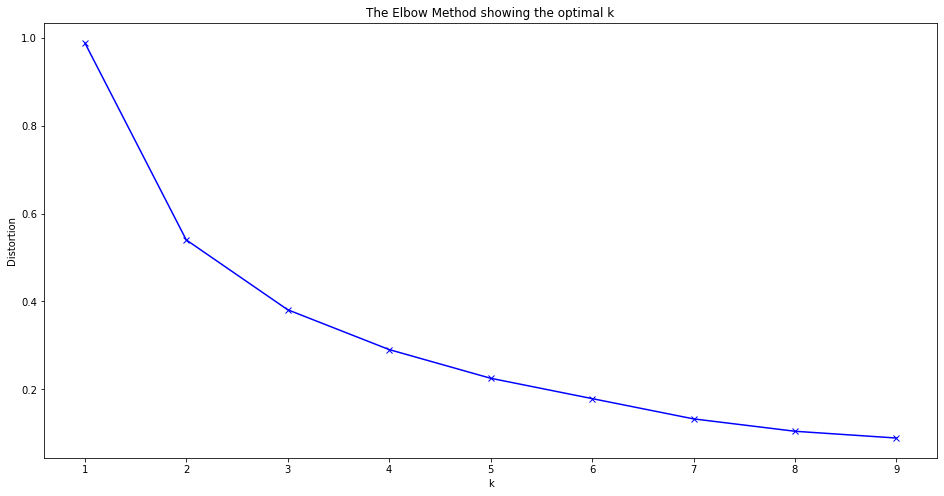

In [307]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [308]:
# set number of clusters accordinf to the Elbow method 
kclusters = 3


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(both_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 2, 0, 1, 0], dtype=int32)

### Get the coordinates of each borough and merge them in one dataframe

In [315]:
#make a dataframe from the df toronto and df newyork and take the mean of the coordinates of the neighborhoods in each borough in order to append it later on the both_merged
toronto_bor_coords=toronto.groupby("Borough").mean()
toronto_bor_coords.reset_index(inplace=True)
toronto_bor_coords

,Borough,Latitude,Longitude
0,Central Toronto,43.701980,-79.398954
1,Downtown Toronto,43.654624,-79.384184
2,Downtown Toronto Stn A,43.646435,-79.374846
3,East Toronto,43.671110,-79.325428
4,East Toronto Business,43.662744,-79.321558
5,East York,43.704043,-79.335287
6,East York/East Toronto,43.685347,-79.338106
7,Etobicoke,43.655797,-79.537348
8,Etobicoke Northwest,43.706748,-79.594054
9,Mississauga,43.636966,-79.615819


In [316]:
newyork_bor_coords=newyork.groupby("Borough").mean()
newyork_bor_coords.reset_index(inplace=True)
newyork_bor_coords

,Borough,Latitude,Longitude
0,Bronx,40.850482,-73.873442
1,Brooklyn,40.651089,-73.952999
2,Manhattan,40.762438,-73.975329
3,Queens,40.706424,-73.824131
4,Staten Island,40.588851,-74.137414


In [335]:
#merging the two dataframes

In [318]:
both_bor_coords=pd.concat([toronto_bor_coords,newyork_bor_coords])

In [319]:
both_bor_coords.reset_index(inplace=True)

In [320]:
both_bor_coords.drop("index",axis=1,inplace=True)

In [321]:
both_bor_coords

,Borough,Latitude,Longitude
0,Central Toronto,43.701980,-79.398954
1,Downtown Toronto,43.654624,-79.384184
2,Downtown Toronto Stn A,43.646435,-79.374846
3,East Toronto,43.671110,-79.325428
4,East Toronto Business,43.662744,-79.321558
5,East York,43.704043,-79.335287
6,East York/East Toronto,43.685347,-79.338106
7,Etobicoke,43.655797,-79.537348
8,Etobicoke Northwest,43.706748,-79.594054
9,Mississauga,43.636966,-79.615819


### Creating a new frame that includes the cluster as well as the 10 most common venues of each borough 

In [322]:
# add clustering labels
both_boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

both_merged = both_bor_coords

# merge both_boroughs_venues_sorted with both_merged to add latitude/longitude for each Borough
both_merged = both_merged.join(both_boroughs_venues_sorted.set_index('Borough'), on='Borough')

both_merged.head()

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,43.701980,-79.398954,0,Coffee Shop,Park,Sandwich Place,Pizza Place,Café,Restaurant,Sushi Restaurant,Dessert Shop,Clothing Store,Italian Restaurant
1,Downtown Toronto,43.654624,-79.384184,0,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Park,Bakery,Clothing Store,Gym
2,Downtown Toronto Stn A,43.646435,-79.374846,0,Coffee Shop,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Hotel,Restaurant,Italian Restaurant,Beer Bar,Café,Bakery
3,East Toronto,43.671110,-79.325428,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Brewery,Bakery,Restaurant,Café,Bookstore,Pub
4,East Toronto Business,43.662744,-79.321558,0,Yoga Studio,Auto Workshop,Park,Comic Shop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place


In [323]:
both_merged

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,43.701980,-79.398954,0,Coffee Shop,Park,Sandwich Place,Pizza Place,Café,Restaurant,Sushi Restaurant,Dessert Shop,Clothing Store,Italian Restaurant
1,Downtown Toronto,43.654624,-79.384184,0,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Park,Bakery,Clothing Store,Gym
2,Downtown Toronto Stn A,43.646435,-79.374846,0,Coffee Shop,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Hotel,Restaurant,Italian Restaurant,Beer Bar,Café,Bakery
3,East Toronto,43.671110,-79.325428,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Brewery,Bakery,Restaurant,Café,Bookstore,Pub
4,East Toronto Business,43.662744,-79.321558,0,Yoga Studio,Auto Workshop,Park,Comic Shop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place
5,East York,43.704043,-79.335287,0,Coffee Shop,Bank,Sporting Goods Shop,Burger Joint,Pizza Place,Indian Restaurant,Athletics & Sports,Beer Store,Supermarket,Sandwich Place
6,East York/East Toronto,43.685347,-79.338106,2,Convenience Store,Park,Accessories Store,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Middle Eastern Restaurant
7,Etobicoke,43.655797,-79.537348,0,Pizza Place,Sandwich Place,Pharmacy,Coffee Shop,Grocery Store,Gym,Fast Food Restaurant,Discount Store,Bakery,Café
8,Etobicoke Northwest,43.706748,-79.594054,1,Garden Center,Truck Stop,Bar,Drugstore,Rental Car Location,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Accessories Store
9,Mississauga,43.636966,-79.615819,0,Coffee Shop,Hotel,Mediterranean Restaurant,Gas Station,Middle Eastern Restaurant,Sandwich Place,American Restaurant,Gym,Burrito Place,Fried Chicken Joint


### Let's visualize the resulted clusters

In [324]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(both_merged['Latitude'], both_merged['Longitude'], both_merged['Borough'],both_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters and determine the discriminating venue categories that distinguish each cluster.

#### Cluster 1

In [330]:
both_merged.loc[both_merged['Cluster Labels'] == 0, both_merged.columns[[0] + list(range(4, both_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Coffee Shop,Park,Sandwich Place,Pizza Place,Café,Restaurant,Sushi Restaurant,Dessert Shop,Clothing Store,Italian Restaurant
1,Downtown Toronto,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Park,Bakery,Clothing Store,Gym
2,Downtown Toronto Stn A,Coffee Shop,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Hotel,Restaurant,Italian Restaurant,Beer Bar,Café,Bakery
3,East Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Brewery,Bakery,Restaurant,Café,Bookstore,Pub
4,East Toronto Business,Yoga Studio,Auto Workshop,Park,Comic Shop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place
5,East York,Coffee Shop,Bank,Sporting Goods Shop,Burger Joint,Pizza Place,Indian Restaurant,Athletics & Sports,Beer Store,Supermarket,Sandwich Place
7,Etobicoke,Pizza Place,Sandwich Place,Pharmacy,Coffee Shop,Grocery Store,Gym,Fast Food Restaurant,Discount Store,Bakery,Café
9,Mississauga,Coffee Shop,Hotel,Mediterranean Restaurant,Gas Station,Middle Eastern Restaurant,Sandwich Place,American Restaurant,Gym,Burrito Place,Fried Chicken Joint
10,North York,Coffee Shop,Clothing Store,Restaurant,Pizza Place,Grocery Store,Bank,Fast Food Restaurant,Sandwich Place,Japanese Restaurant,Park
11,Queen's Park,Coffee Shop,Sushi Restaurant,Yoga Studio,Japanese Restaurant,Smoothie Shop,Mexican Restaurant,Café,Fried Chicken Joint,Sandwich Place,Beer Bar


#### Cluster 2

In [331]:
both_merged.loc[both_merged['Cluster Labels'] == 1, both_merged.columns[[0] + list(range(4, both_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Etobicoke Northwest,Garden Center,Truck Stop,Bar,Drugstore,Rental Car Location,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Accessories Store


#### Cluster 3

In [332]:
both_merged.loc[both_merged['Cluster Labels'] == 2, both_merged.columns[[0] + list(range(4, both_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,East York/East Toronto,Convenience Store,Park,Accessories Store,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Middle Eastern Restaurant
